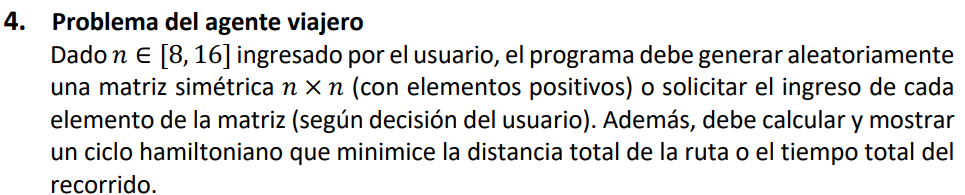

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx as nx

In [132]:
def generarArbol(mtx):
    num_nodes = len(mtx)  # Get the number of nodes from the matrix size
    visitado = []  # List to track the visited nodes
    vertices = []  # To store the MST edges
    root = 0  # Starting node
    visitado.append(root)
    peso = 0

    # Repeat until all nodes are in the visited list (MST)
    while len(visitado) < num_nodes:
        menor = 1000  # Start with an infinite value for the smallest edge
        u, v = -1, -1  # Variables to store the selected nodes of the smallest edge

        # Loop through all visited nodes to find the smallest edge to an unvisited node
        for i in visitado:
            for j in range(num_nodes):
                if j not in visitado and mtx[i][j] > 0 and mtx[i][j] < menor:
                    menor = mtx[i][j]
                    
                    nIni, nFin = i, j
        peso += menor

        # Add the found smallest edge to the MST and mark the node as visited
        if nFin != -1:
            vertices.append((nIni, nFin, menor))  # Append the edge (u, v) with weight 'menor'
            visitado.append(nFin)  # Add the new node to the visited list

    return vertices,peso



In [133]:
def mtxAdyacencia(mst,n):
    listaAd = defaultdict(list)
    
    # Loop over all edges and add to adjacency list
    for nIni, nFin, weight in mst:
        listaAd[nIni].append(nFin)
        listaAd[nFin].append(nIni)  # Since it's an undirected graph, add both directions
    
    return listaAd

def preOrden(listaAd, node, visited):
    visited.add(node)
    preOrd=[]
    preOrd.append(node)
    #print(node, end=" ")  # Visit the node
    
    # Recur for all the vertices adjacent to this vertex
    for neighbor in listaAd[node]:
        if neighbor not in visited:
            preOrd.extend(preOrden(listaAd, neighbor, visited))
    return preOrd


In [134]:
while True:
    nstr = input("Ingrese un numero entre 8 y 16: ")
    n = int(nstr)
    if n>=8 and n<=16:
        break
    else:
        print("Revise el numero ingresado")

In [135]:
A = np.random.randint(low=0,high =20,size=(n,n))
A_T=A.transpose()
B = ( A + A_T)/2
#print(A)
B = B.astype('int')
np.fill_diagonal(B,0)

print(B)


[[ 0 10 11  5 11  8  3  6 10 16]
 [10  0  7  8 12  8  4  9 14 10]
 [11  7  0  5  9  9 14 10 11 11]
 [ 5  8  5  0 11  6  6 11 11 10]
 [11 12  9 11  0 11  8  6 12 12]
 [ 8  8  9  6 11  0  5  6  5  6]
 [ 3  4 14  6  8  5  0 13  4 15]
 [ 6  9 10 11  6  6 13  0  8  2]
 [10 14 11 11 12  5  4  8  0 10]
 [16 10 11 10 12  6 15  2 10  0]]


In [136]:
mst,peso = generarArbol(B)
print(mst)
listaAd = mtxAdyacencia(mst,n)
visited = set()  # To keep track of visited nodes
preO = preOrden(listaAd, 0, visited)
preO.append(preO[0])
print(peso)
peso += B[preO[-2]][preO[-1]]
print(preO,"\n",peso)

[(0, 6, 3), (6, 1, 4), (6, 8, 4), (0, 3, 5), (6, 5, 5), (3, 2, 5), (0, 7, 6), (7, 9, 2), (7, 4, 6)]
40
[0, 6, 1, 8, 5, 3, 2, 7, 9, 4, 0] 
 51


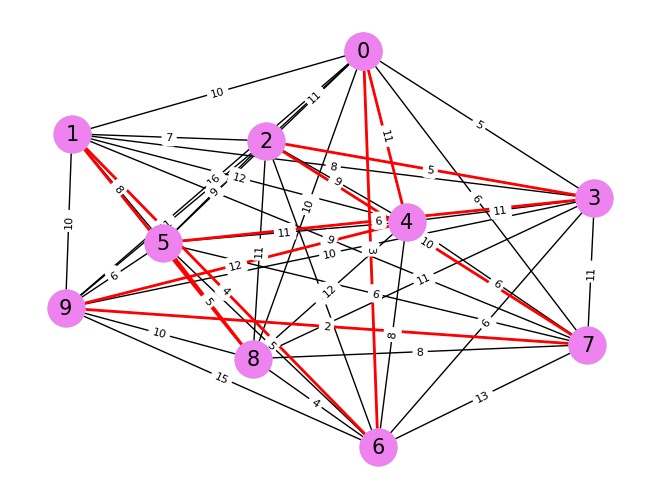

In [137]:
# Step 1: Define a symmetric weight matrix (example with 4 nodes)
weight_matrix = B

# Step 2: Create a graph from the weight matrix
G = nx.Graph()
bordes=mst

hamiltonian_path=preO
# Add edges with weights based on the matrix
n = weight_matrix.shape[0]  # Number of nodes
for i in range(n):
    for j in range(i+1, n):  # Only look at upper triangular matrix (since it's symmetric)
        if weight_matrix[i, j] != 0:  # Add an edge only if the weight is non-zero
            G.add_edge(i, j, weight=weight_matrix[i, j])
G.add_weighted_edges_from(bordes)
# Step 3: Draw the graph
pos = nx.spring_layout(G)  # Use spring layout for node positions
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=15)
path_edges = list(zip(hamiltonian_path, hamiltonian_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
nx.draw_networkx_nodes(G, pos, nodelist=hamiltonian_path, node_color="violet", node_size=700)

# Step 4: Draw edge labels (weights)
edge_labels = {(i, j): f'{d["weight"]}' for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.show()

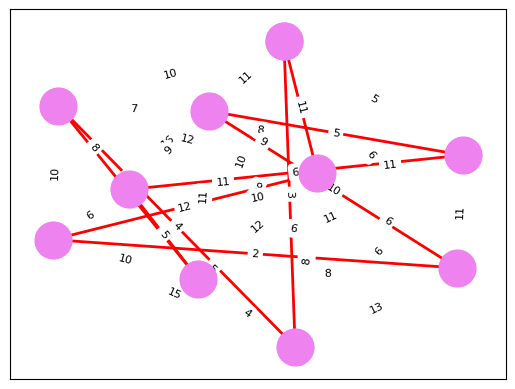

In [138]:
G.add_weighted_edges_from(bordes)


path_edges = list(zip(hamiltonian_path, hamiltonian_path[1:]))
#nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=15)
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
nx.draw_networkx_nodes(G, pos,nodelist=hamiltonian_path, node_color="violet", node_size=700)
edge_labels = {(i, j): f'{d["weight"]}' for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)


plt.show()

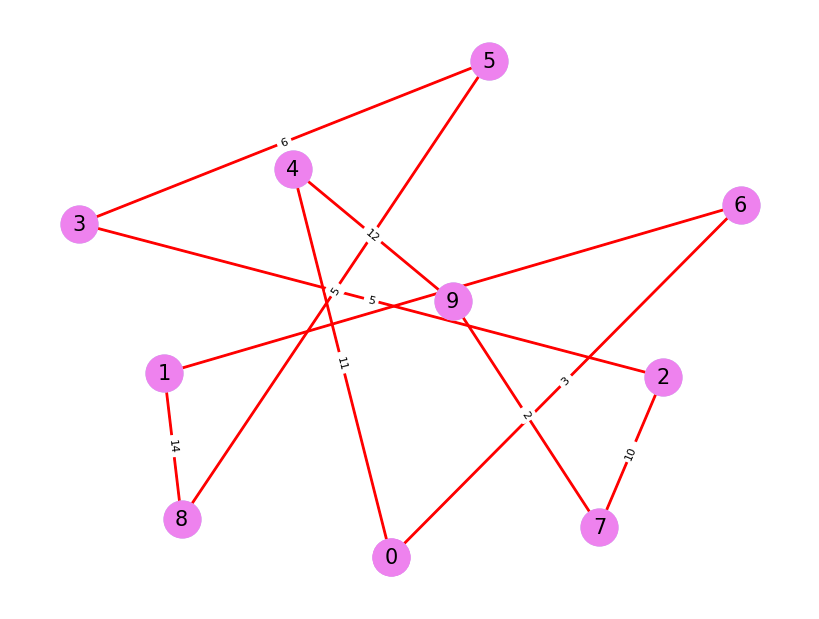

In [139]:
# Step 1: Create the full graph with all edges from the weight matrix
H = nx.Graph()

# Add all edges with weights based on the weight matrix
n = weight_matrix.shape[0]  # Number of nodes
for i in range(n):
    for j in range(i+1, n):  # Only upper triangular part (since it's symmetric)
        if weight_matrix[i, j] != 0:
            G.add_edge(i, j, weight=weight_matrix[i, j])

# Also, add edges from MST if needed
G.add_weighted_edges_from(bordes)

# Step 2: Calculate the layout using the full graph
pos = nx.spring_layout(G)  # Compute positions using the full graph

# Step 3: Remove edges not in the Hamiltonian path
path_edges = list(zip(hamiltonian_path, hamiltonian_path[1:]))

# Create a set of edges to remove
edges_to_remove = [edge for edge in G.edges() if edge not in path_edges and (edge[1], edge[0]) not in path_edges]

# Remove unwanted edges
G.remove_edges_from(edges_to_remove)

# Step 4: Draw the graph (only Hamiltonian path remains)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=15)

# Highlight only the Hamiltonian path edges in red
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
nx.draw_networkx_nodes(G, pos, nodelist=hamiltonian_path, node_color="violet", node_size=700)

# Step 5: Draw edge labels (weights) only for Hamiltonian path edges
hamiltonian_edge_labels = {(i, j): f'{G[i][j]["weight"]}' for i, j in path_edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=hamiltonian_edge_labels, font_size=8)

# Show the plot

plt.show()


In [140]:
def crearGrafo(n,preO): 
    nd = gv.Digraph(node_attr={'shape': 'circle'},format='png')
    for i in range(n):
        x=round(2.5*i)
        y=i+1
        nd.node(chr(65+i),label=chr(65+i), pos=f'{x},{y}!')
    for i in range(n):
        nd.edge(chr(65+preO[i]),chr(65+preO[i+1]))
    #nd.attr(nodesep='3',ranksep='')    
    #display(nd)
crearGrafo(n,preO)

In [141]:
g = gv.Digraph(node_attr={'shape': 'circle'},format='png')
for i in range(n):
    for j in range(n):
        if B[i,j]!=0:
            g.edge(chr(65+i),chr(65+j),label=str(B[i,j]))
        
#display(g)